# Words Average Length

## Բառերի օգտագործման հաճախականությունը

Այս հետազոտության նպատակը՝ ցույց տալն է, թե ինչքան էն տարբերվում Հայերենը և Ռուսերենը: Որպես տվյալներ ընտրվել են Հովհաննես Թումանյանի Պատմվածքները Հայերեն լեզվի համար և Միխայիլ Բուլգակովի "Մաստեր և Մարգարիտա" գիրքը Ռուսերենի համար:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Ամենասկզբից երկու ֆայլերը պիտի մշակվեն՝ այսինքն ջնջվեն բոլոր կետադրական նշանները։ Իդեպ, հաշվի առնելով, որ հայերեն լեզվում "ու" և "եւ" տառեըը պարունակում են 2 նշան, տեքստից բացի կետադրական նշաններից նաև ջնջվել է "ւ" նշանը։ Հետագայում սա պիտի հաշվի առվի։
Երկու տեքստը մշակելուց հետո հաշվվում են բառերի քանակները։

In [2]:
armenian_punctuation = "«»,՝․։:՜՛՞֊՟՚`-—...–1234567890ւ"
common_punctuation = "!\"#$%&'()*+, -./:;<=>?@[\]^_`{|}~1234567890—–"

data = []
data_ru = []

with open('data/Patmvatskner-Hovhannes_Tumanyan.txt') as f:
    for line in f:
        for word in line.split():
            word = word.lower()
            data.append(word.translate(str.maketrans('', '', armenian_punctuation)))
            
with open('data/master-margarita.txt') as f:
    for line in f:
        for word in line.split():
            word = word.lower()
            data_ru.append(word.translate(str.maketrans('', '', common_punctuation)))

data = np.array(data)
data = data[ (data != '') ]

data_ru = np.array(data_ru)
data_ru = data_ru[ (data_ru != '') ]
print("Volume:\t", len(data))
print("Volume:\t", len(data_ru))

Volume:	 30200
Volume:	 112782


Այստեղ առանձնացվում են ամենահաճախ օգտագործվող 30 բառերը ամեն տեքստում։ Արդյունքում ստացվում է tuple, բաղկացած երկու մասից՝ բառը և իր օգտագործման հաճախականությունը։

In [3]:
from collections import Counter

counts = Counter(data).most_common(30)
counts_ru = Counter(data_ru).most_common(30)
print(counts)
print(counts_ru)

[('ո', 736), ('է', 732), ('էր', 583), ('մի', 581), ('էլ', 548), ('որ', 542), ('են', 324), ('ես', 300), ('թե', 279), ('ինչ', 229), ('և', 226), ('էին', 211), ('ա', 180), ('եմ', 168), ('էս', 166), ('էն', 165), ('նա', 136), ('վրա', 134), ('չի', 134), ('մեր', 127), ('իր', 115), ('ասոմ', 108), ('դորս', 106), ('բայց', 105), ('բան', 98), ('վեր', 95), ('էդ', 94), ('շատ', 92), ('նրա', 91), ('անոմ', 91)]
[('и', 5010), ('в', 3642), ('не', 2023), ('на', 2001), ('что', 1740), ('с', 1292), ('он', 1144), ('а', 957), ('я', 853), ('как', 836), ('но', 709), ('к', 698), ('его', 686), ('это', 636), ('же', 591), ('из', 528), ('у', 528), ('по', 474), ('за', 465), ('было', 464), ('все', 440), ('маргарита', 420), ('так', 403), ('вы', 399), ('она', 393), ('от', 382), ('то', 355), ('о', 324), ('тут', 305), ('был', 304)]


Հետևյալ գրաֆիկները ցույց են տալիս մանրամասները երկու գրականությունները համեմատությունը։ Անհրաժեշտ է նշել, որ Ռուսերեն լեզվով գիրքը 3 անգամից ավել ծավալուն է, քան հայերենը, ուստի ավելի մեծ տվյալների քանակի  շնորհիվ, արդյունքները Ռուսերեն լեզվի համար ավելի դիպուկ են։

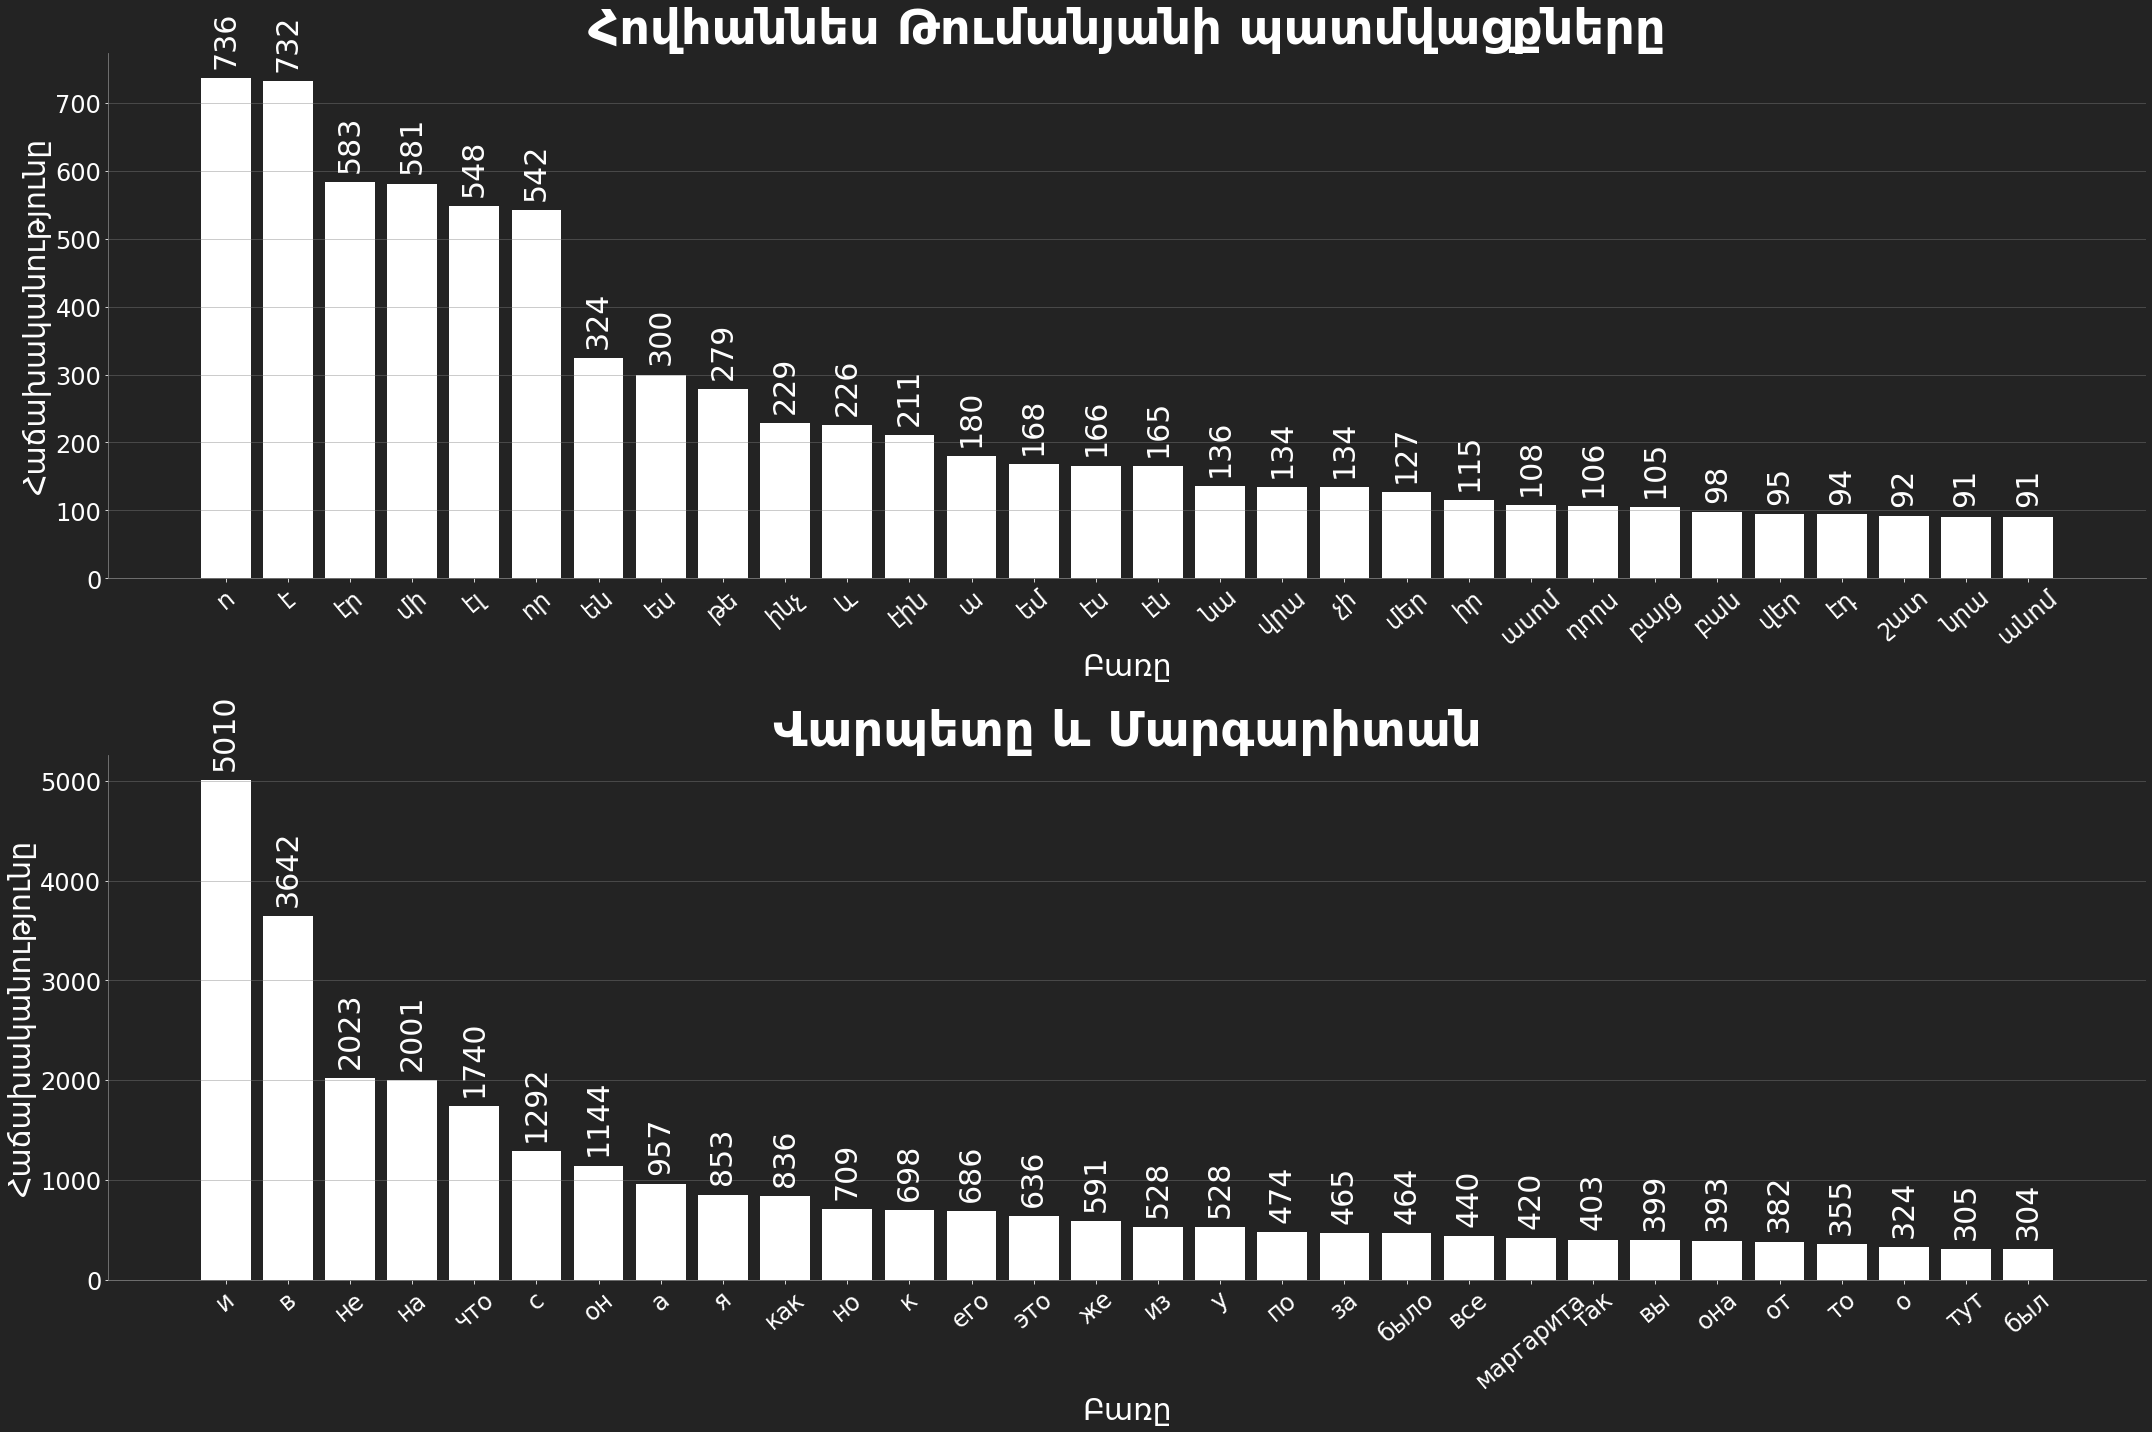

In [4]:
X, y = zip(*counts)
X_ru, y_ru = zip(*counts_ru)

fig, axes = plt.subplots(2, 1, figsize=(30, 20))
bins = axes[0].bar(X, y, color='white')
axes[0].set_title("Հովհաննես Թումանյանի պատմվացքները", color='white', fontsize=48, fontweight='bold')
axes[0].grid(axis='y', color='gray', alpha=0.5)
axes[0].bar_label(bins, color='white', fontsize=30, rotation='vertical', padding=10)
axes[0].set_xlabel('Բառը', color='white', fontsize=30)
axes[0].set_ylabel('Հաճախականությունը', color='white', fontsize=30)

bins = axes[1].bar(X_ru, y_ru, color='white')
axes[1].set_title("Վարպետը և Մարգարիտան", color='white', fontsize=48, fontweight='bold')
axes[1].grid(axis='y', color='gray', alpha=0.5)
axes[1].bar_label(bins, color='white', fontsize=30, rotation='vertical', padding=10)
axes[1].set_xlabel('Բառը', color='white', fontsize=30)
axes[1].set_ylabel('Հաճախականությունը', color='white', fontsize=30)

for i in range(2):
    axes[i].set_facecolor('#232323')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_color('gray')
    axes[i].spines['bottom'].set_color('gray')
    axes[i].tick_params(axis='x', colors='white', labelsize=24, rotation=40)
    axes[i].tick_params(axis='y', colors='white', labelsize=24)

fig.set_facecolor('#232323')
plt.tight_layout()
plt.show()

## Բառի միջին երկարությունը

Հաջորդ քայլը իրականացված է երկու տեքստի բառի միջին երկարությունը հաշվելու համար։ Ենթադրենք, որ բառի երկարությունը նշանակում է, թե քանի տառ է պարունակում բառը։ 

In [5]:
letters_count = 0
words_count = 0
letters_count_limited = 0
words_count_limited = 0

letters_count_ru = 0
words_count_ru = 0
letters_count_limited_ru = 0
words_count_limited_ru = 0

words_length = []
words_length_limited = []
words_length_ru = []
words_length_limited_ru = []

for i in data:
    if i not in X[:15]:
        letters_count_limited += len(i)
        words_count_limited += 1
    letters_count += len(i)
    words_length.append(len(i))
    words_count += 1
    
for i in data_ru:
    if i not in X_ru[:15]:
        letters_count_limited_ru += len(i)
        words_count_limited_ru += 1
    letters_count_ru += len(i)
    words_length_ru.append(len(i))
    words_count_ru += 1
    
average_word_length = letters_count/words_count
average_word_length_ru = letters_count_ru/words_count_ru

print('\t\t\t', "Full", '\t\t\t', 'Limited')
print("Total letters' count:\t", letters_count, '\t\t', letters_count_limited)
print("Average word length:\t", average_word_length, '\t', letters_count_limited/words_count_limited)
print()
print('\t\t\t', "Full", '\t\t\t', 'Limited')
print("Total letters' count:\t", letters_count_ru, '\t\t', letters_count_limited_ru)
print("Average word length:\t", average_word_length_ru, '\t', letters_count_limited_ru/words_count_limited_ru)

			 Full 			 Limited
Total letters' count:	 135402 		 125226
Average word length:	 4.483509933774834 	 5.1332650133224025

			 Full 			 Limited
Total letters' count:	 599901 		 562819
Average word length:	 5.319120072351971 	 6.25604686318972


Այստեղ ցույց են տված գրաֆիկները։

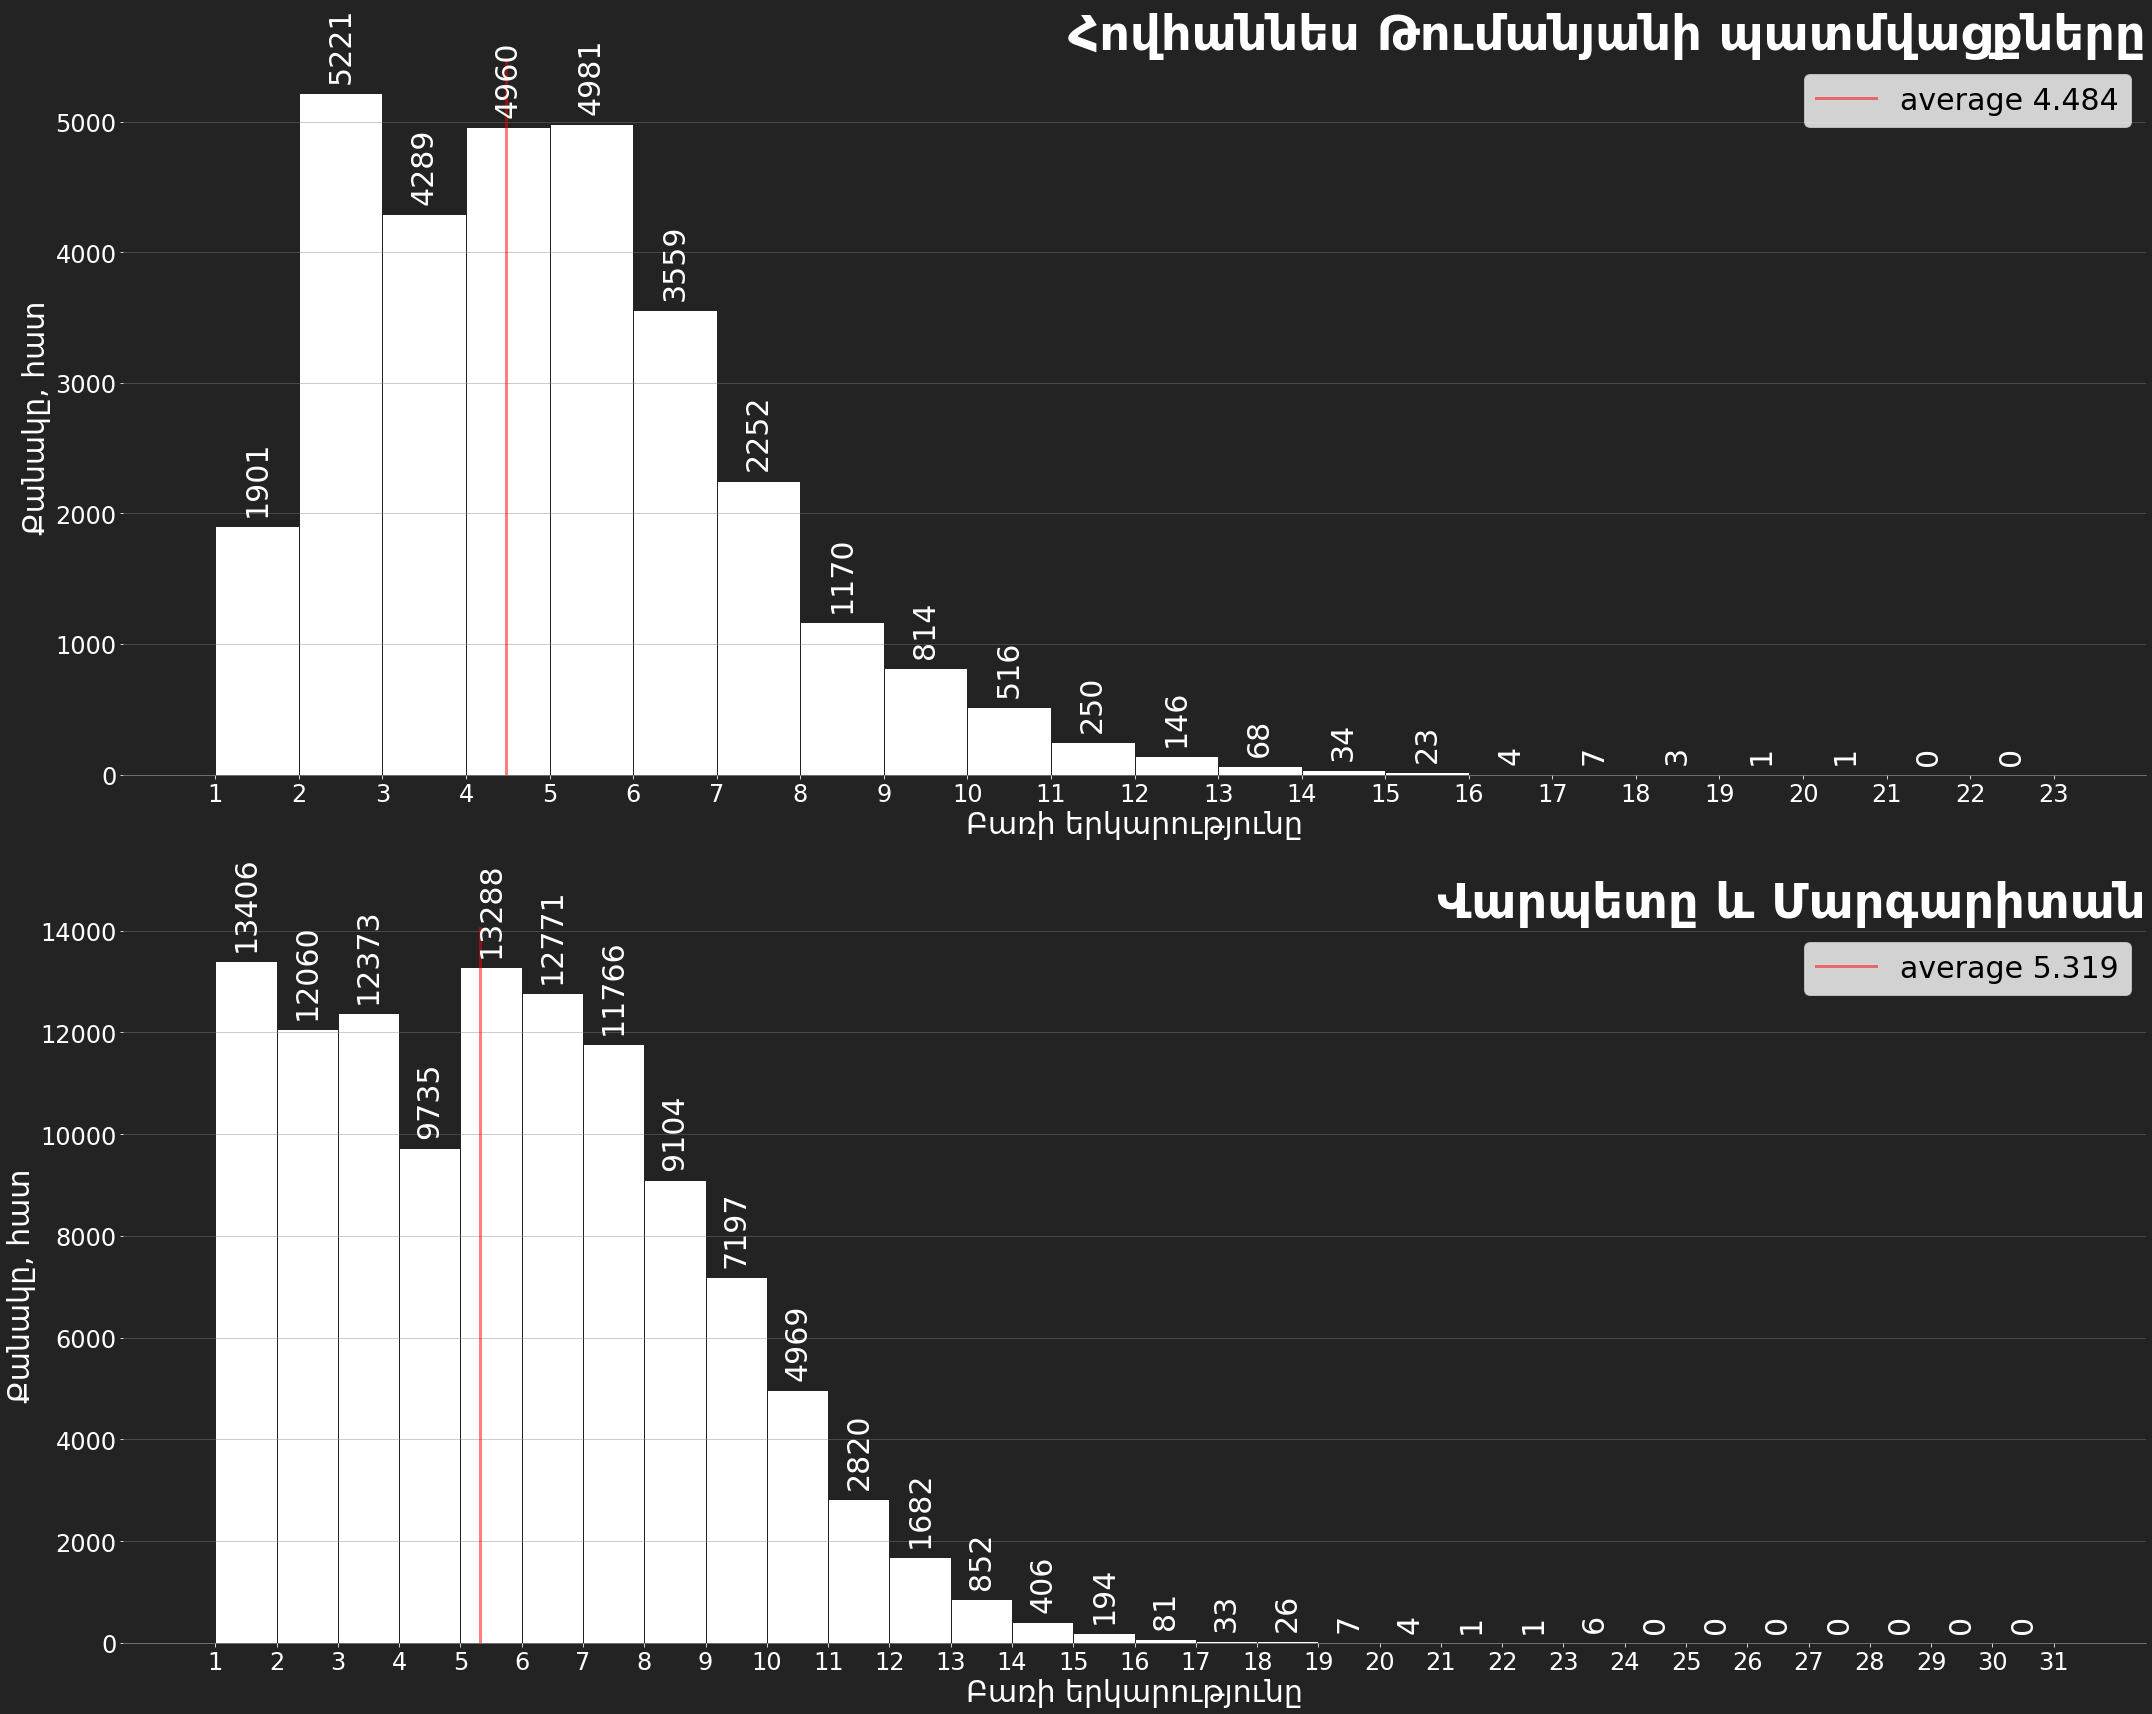

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(30, 24))
counts, edges, bins = axes[0].hist(words_length, bins=range(1,24), color='white', edgecolor='#232323', linewidth=1)
axes[0].bar_label(bins, color='white', fontsize=30, rotation='vertical', padding=10)
axes[0].set_title("Հովհաննես Թումանյանի պատմվացքները", color='white', fontsize=48, fontweight='bold', loc='right')
axes[0].set_xticks(range(1,24))
axes[0].axvline(x=average_word_length, color='red', linestyle='-', alpha=0.5, linewidth=3, label="average " + str(round(average_word_length, 3)))

counts, edges, bins = axes[1].hist(words_length_ru, bins=range(1,32), color='white', edgecolor='#232323', linewidth=1)
axes[1].bar_label(bins, color='white', fontsize=30, rotation='vertical', padding=10)
axes[1].set_title("Վարպետը և Մարգարիտան", color='white', fontsize=48, fontweight='bold', loc='right')
axes[1].set_xticks(range(1,32))
axes[1].axvline(x=average_word_length_ru, color='red', linestyle='-', alpha=0.5, linewidth=3, label="average " + str(round(average_word_length_ru, 3)))

for i in range(2):
    axes[i].grid(axis='y', color='gray', alpha=0.5)
    axes[i].set_facecolor('#232323')
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_color('gray')
    axes[i].set_xlabel('Բառի երկարությունը', color='white', fontsize=30)
    axes[i].set_ylabel('Քանակը, հատ', color='white', fontsize=30)
    axes[i].tick_params(colors='white', labelsize=24)
    axes[i].legend(fontsize=30)


# plt.xticks(range(1,24), color='white', fontsize=24)
# plt.yticks(color='white', fontsize=24)

fig.set_facecolor('#232323')

plt.tight_layout()
plt.show()

Ամենաերկար բառերը

In [7]:
# the longest words
for i in data:
    if len(i) >= 19:
        print(i)

առանձնահատկոթյոնները
անդամահատոթյոններին


In [8]:
for i in data_ru:
    if len(i) >= 23:
        print(i)

предупредительновежливо
профессоруневропатологу
достопримечательностями
достопримечательностями
достопримечательностями
старенькийпрестаренький
